# ダミーデータの作成

機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

## 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\left[\begin{array}{c}
1.0 & 0.8 \\
0.8 & 1.0 \\
\end{array}\right]
$$

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。


numpy.random.multivariate_normal — NumPy v1.16 Manual


作成したndarrayのshapeは(500, 2)になります。


《シード値について》


実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [6]:
import numpy as np

mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])

np.random.seed(0)
data1 = np.random.multivariate_normal(mean, cov, size=500)

print(data1.shape)
print(np.mean(data1, axis=0))
print(np.cov(data1, rowvar=0)) #データが縦方向に並んでいるのでrowvar=0(False)

(500, 2)
[-2.93003625  0.05405893]
[[0.94877101 0.75453518]
 [0.75453518 0.96104806]]


## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。


散布図はmatplotlibのplt.scatter()を使うことで描けます。

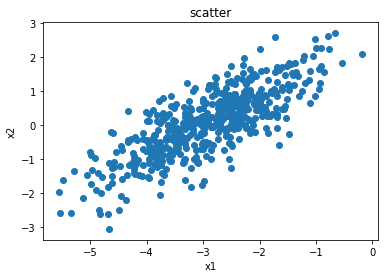

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = data1[:, 0]
x2 = data1[:, 1]

plt.title('scatter')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1, x2)
plt.show()

## 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。


ヒストグラムはplt.hist()を使うことで描けます。


matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


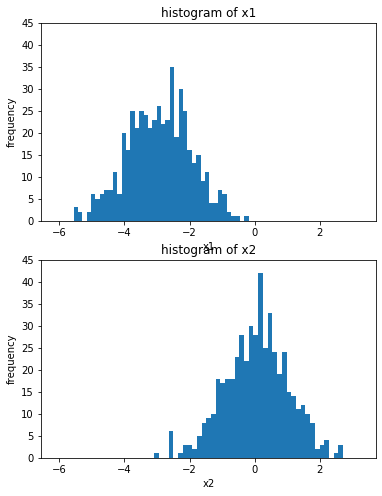

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 8))

ax1.hist(x1, bins=40)
ax1.set_title('histogram of x1')
ax1.set_xlabel('x1')
ax1.set_ylabel('frequency')
ax1.set_xlim(np.min(data1)-1, np.max(data1)+1)
ax1.set_ylim(0, 45)

ax2.hist(x2, bins=40)
ax2.set_title('histogram of x2')
ax2.set_xlabel('x2')
ax2.set_ylabel('frequency')
ax2.set_xlim(np.min(data1)-1, np.max(data1)+1)
ax2.set_ylim(0, 45)

fig.show()

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\left[\begin{array}{c}
1.0 & 0.8 \\
0.8 & 1.0 \\
\end{array}\right]
$$

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

In [7]:
mean2 = np.array([0,-3])
cov2 = np.array([[1.0, 0.8], [0.8, 1.0]])

np.random.seed(0)
data2 = np.random.multivariate_normal(mean2, cov2, size=500)

print(data2.shape)
print(np.mean(data2, axis=0))
print(np.cov(data2, rowvar=0))

(500, 2)
[ 0.06996375 -2.94594107]
[[0.94877101 0.75453518]
 [0.75453518 0.96104806]]


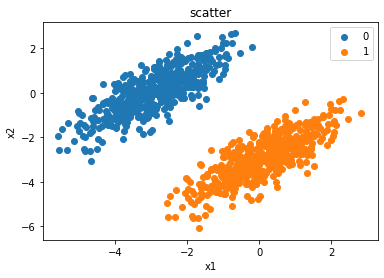

In [79]:
new_x1 = data2[:, 0]
new_x2 = data2[:, 1]

plt.title('scatter')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1, x2, label='0')
plt.scatter(new_x1, new_x2, label='1')
plt.legend()
plt.show()

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [100]:
data = np.concatenate([data1, data2])
print(data.shape)

(1000, 2)


## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。

In [101]:
#方法1
data1_label = np.insert(data1, 2, 0, axis=1)
data2_label = np.insert(data2, 2, 1, axis=1)
data_label = np.concatenate([data1_label, data2_label])

print(data_label.shape)
print(data_label)

(1000, 3)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]


In [104]:
#方法2
label = np.concatenate([np.zeros(500), np.ones(500)])
label = label.reshape(1, 1000)
data_label_v2 = np.insert(data, 2, label, axis=1)
print(data_label_v2.shape)
print(data_label_v2)

(1000, 3)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.40484501 -3.14372258  1.        ]
 [ 0.1584315  -2.78199606  1.        ]
 [ 1.20196495 -2.02452628  1.        ]]
